In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/home/arnav/anaconda3/envs/deeplearning/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/arnav/anaconda3/envs/deeplearning/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
index = imdb.get_word_index()
rev_index = dict([(value, key) for (key, value) in index.items()])
decode_review = ' '.join([rev_index.get(i-3, '?') for i in train_data[0]])
# print(decode_review)

In [4]:
#one hot encode the training data
import numpy as np

def vectorize(seq, dim=10000) :
    res = np.zeros((len(seq), dim))
    for i, s in enumerate(seq) :
        res[i, s] = 1
    return res

x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
#split training data into train and validation sets
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
#with 20 epochs, model overfits
# history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

#with 4 epochs, it gives better results
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 1s 27ms/step - loss: 0.5116 - accuracy: 0.7819 - val_loss: 0.3927 - val_accuracy: 0.8621
Epoch 2/4
30/30 [==============================] - 1s 19ms/step - loss: 0.3062 - accuracy: 0.9029 - val_loss: 0.3055 - val_accuracy: 0.8864
Epoch 3/4
30/30 [==============================] - 1s 20ms/step - loss: 0.2221 - accuracy: 0.9301 - val_loss: 0.2876 - val_accuracy: 0.8867
Epoch 4/4
30/30 [==============================] - 1s 19ms/step - loss: 0.1769 - accuracy: 0.9431 - val_loss: 0.2911 - val_accuracy: 0.8813


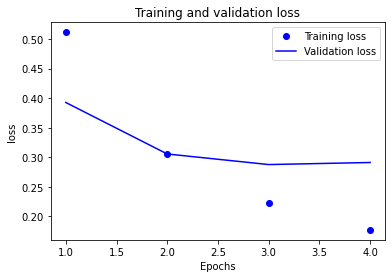

In [10]:
#plot the training and validation loss and accuracy
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [11]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 2s 2ms/step - loss: 0.3042 - accuracy: 0.8770
[0.3041556179523468, 0.8769599795341492]
